In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("Churn_Modelling.csv")

dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
X = dataset.iloc[:,3:13]
Y = dataset.iloc[:,13]



In [4]:
geography = pd.get_dummies(X["Geography"], drop_first=True)
gender = pd.get_dummies(X["Gender"], drop_first=True)

In [5]:
X = pd.concat([X, geography, gender], axis=1)

In [6]:
X.drop(["Gender", "Geography"],axis = 1, inplace=True)

In [7]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [8]:
x_train, X_test, y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(X_test)

In [10]:
import keras
from keras._tf_keras.keras.models import Sequential
from keras._tf_keras.keras.layers import ReLU,PReLU,LeakyReLU,ELU,Dense
from keras._tf_keras.keras.initializers import HeNormal,GlorotUniform, HeUniform

In [11]:
classifier = Sequential()

classifier.add(Dense(units = 6, kernel_initializer =HeUniform(), input_shape=(11,)))
classifier.add(LeakyReLU(alpha=0.01))

classifier.add(Dense(units = 6, kernel_initializer =HeUniform()))
classifier.add(LeakyReLU(alpha=0.01))

classifier.add(Dense(units = 1, kernel_initializer =  GlorotUniform(), activation = "sigmoid"))

classifier.compile(optimizer= "adam", loss= "binary_crossentropy", metrics= ["accuracy"])


c:\Users\Sanket Anand\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Sanket Anand\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [12]:
model_history = classifier.fit(x_train,y_train, validation_split = 0.33, batch_size=10, epochs = 100)
model_history.history.keys()

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7908 - loss: 0.5108 - val_accuracy: 0.8020 - val_loss: 0.4590
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8039 - loss: 0.4456 - val_accuracy: 0.8020 - val_loss: 0.4443
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8085 - loss: 0.4304 - val_accuracy: 0.8050 - val_loss: 0.4388
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8208 - loss: 0.4210 - val_accuracy: 0.8073 - val_loss: 0.4358
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8158 - loss: 0.4314 - val_accuracy: 0.8126 - val_loss: 0.4338
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8265 - loss: 0.4145 - val_accuracy: 0.8122 - val_loss: 0.4321
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8137 - loss: 0.4322 - val_accuracy: 0.8145 - val_loss: 0.4298
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8186 - loss: 0.4242 - val_accu

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [13]:
pred = classifier.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [14]:
pred = pred > 0.5

In [15]:
from sklearn.metrics import accuracy_score


accuracy_score(Y_test,pred)

0.8395

In [16]:
dataset.shape

(10000, 14)

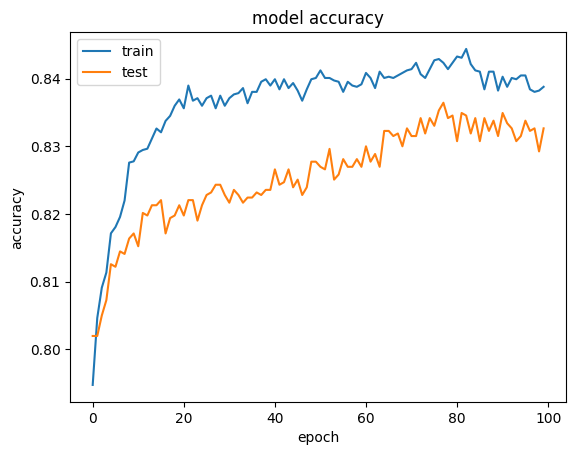

In [17]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"], loc="upper left")
plt.show()

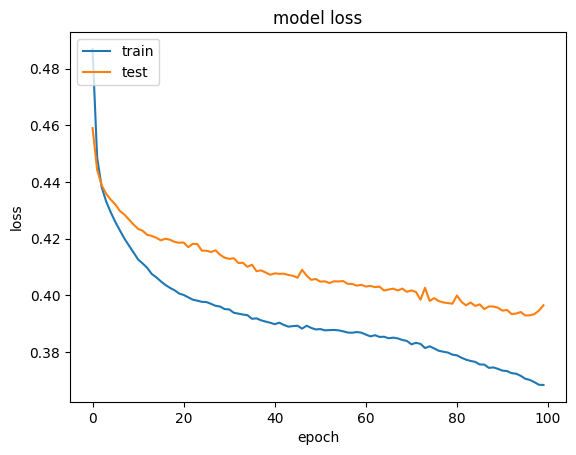

In [18]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","test"], loc="upper left")
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(Y_test,pred)

In [20]:
cm

array([[1550,   45],
       [ 276,  129]], dtype=int64)

## Hyperparameters tuning

In [21]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras._tf_keras.keras.activations import sigmoid, relu
from keras._tf_keras.keras.layers import Activation, Embedding, Flatten, Dropout

In [22]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes, input_dim=x_train.shape[1], activation=activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes), activation = activation)
            model.add(Dropout(0.3))
        
        model.add(Dense(units = 1, kernel_initializer="glorot_uniform", activation="sigmoid"))

    model.compile(optimizer="adam", loss= "binary_crossentropy", metrics=["accuracy"])
    return model

In [23]:
model = KerasClassifier(build_fn=create_model, verbose=0)

In [25]:
model__layers = [[20], [40,20], [45,30,15]]
model__activations = ["sigmoid", "relu"]

param_grid = dict(model__layers=model__layers, model__activation = model__activations, batch_size = [64,128,256], epochs = [30])
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv = 5)

grid_result = grid.fit(x_train,y_train)

c:\Users\Sanket Anand\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Sanket Anand\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Sanket Anand\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Sanket Anand\AppData\Local\Programs\Python\Python311\Lib\site-pa

c:\Users\Sanket Anand\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Sanket Anand\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


c:\Users\Sanket Anand\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Sanket Anand\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Sanket Anand\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Sanket Anand\AppData\Local\Programs\Python\Python311\Lib\site-pa

In [26]:
KerasClassifier().get_params().keys()

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'class_weight'])

In [29]:
grid.best_params_

{'batch_size': 64,
 'epochs': 30,
 'model__activation': 'relu',
 'model__layers': [20]}

In [40]:
model = grid.best_estimator_

In [31]:
import pickle 

with open("model.pkl", "wb") as f:
    pickle.dump(model,f)

In [41]:
grid.best_score_

0.8514999999999999

In [45]:
model_history = model.fit(x_train,y_train, validation_split = 0.33, batch_size=10, epochs = 100)

c:\Users\Sanket Anand\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Sanket Anand\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
pred = model.predict(X_test)
pred = pred > 0.5

Y_test = Y_test > 0.5

In [47]:
accuracy_score(Y_test,pred)

0.867